## Lab | Imbalanced data


Import libraries.

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler #Only if data distribution is normal
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from collections import Counter
from imblearn.over_sampling import SMOTE

Load dataset.

In [3]:
customer_churn = pd.read_csv('files_for_lab/customer_churn.csv')
display(customer_churn.head(50))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


With the following code we can observe that:

- Neither of the columns contains missing data (NaN values)
- Although the data type of SeniorCitizen is identified as numeric, this column contains labeled binary data (whether the customer is a senior citizen or not (yes: 1, no: 0)). Therefore, we can handle this column as categorical.

If we were to clean the data, we should bear in mind that:

- Column names need to be standardized.
- The data type of Total Charges column is identified as 'object', but this column contains numerical information (the total amount charged to the customer), so we should take a look and clean the data.

More info here: https://towardsdatascience.com/customer-churn-analysis-eda-a688c8a166ed

In [4]:
print('Dataframe shape:', customer_churn.shape)
print('')
customer_churn.info()

Dataframe shape: (7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

In [5]:
customer_churn['SeniorCitizen'] = customer_churn['SeniorCitizen'].astype('object')
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.**

1. Extract the target variable.

* Tenure: Number of months the customer has been with the company
* MonthlyCharges:The monthly amount charged to the customer

In [7]:
# X-y split
customer_churn_cp = customer_churn.copy()
X = customer_churn_cp[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = customer_churn_cp['Churn']

display(X)
display(y)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state= 42)

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

2. Extract the independent variables and scale them.

In [8]:
# Scaling data for train set
X_train_num = X_train.select_dtypes(include = np.number)
transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns = X_train_num.columns)
display(X_train_norm)

,tenure,MonthlyCharges
0,0.291667,0.464375
1,0.750000,0.786746
2,0.013889,0.051819
3,0.055556,0.517688
4,0.000000,0.434978
...,...,...
5629,0.013889,0.764823
5630,0.319444,0.725959
5631,0.166667,0.028899
5632,0.166667,0.809168


In [9]:
# Our categorical data is already encoded, so we can proceed to concatenate
# all columns into one dataframe for X features
X_train_categorical = X_train.select_dtypes(include = 'object')
X_train_transformed = np.concatenate([X_train_norm, X_train_categorical], axis=1)
X_train_transformed

array([[0.29166666666666663, 0.46437468858993514, 0],
       [0.75, 0.7867463876432487, 0],
       [0.013888888888888888, 0.05181863477827603, 0],
       ...,
       [0.16666666666666666, 0.028898854010961622, 0],
       [0.16666666666666666, 0.8091679123069259, 1],
       [0.3611111111111111, 0.01544593921275536, 0]], dtype=object)

In [10]:
# Now let's repeat this process with the test set
X_test_num = X_test.select_dtypes(include = np.number)
transformer = MinMaxScaler().fit(X_test_num)

# Numerical features
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns = X_test_num.columns)

# Categorical features
X_test_categorical = X_test.select_dtypes(include = 'object')


X_test_transformed = np.concatenate([X_test_norm, X_test_categorical], axis=1)
X_test_transformed

array([[0.013888888888888888, 0.06096951524237884, 0],
       [0.5694444444444444, 0.06546726636681663, 0],
       [0.7222222222222222, 0.006496751624187946, 0],
       ...,
       [0.2361111111111111, 0.011994002998500758, 0],
       [0.9583333333333333, 0.2523738130934533, 0],
       [0.013888888888888888, 0.12643678160919544, 0]], dtype=object)

#### Build the logistic regression model.


In [11]:
# Making predictions on train set
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

y_train_pred = classification.predict(X_train_transformed)
y_train_pred

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [12]:
# Making predictions on test set
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_test_transformed, y_test)

y_test_pred = classification.predict(X_test_transformed)
y_test_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

#### Evaluate the model.

In [26]:
# Setting pos_label = 'Yes'
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred, pos_label= 'Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred, pos_label= 'Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred, pos_label= 'Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.69
The recall in the TEST set is: 0.49
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.45


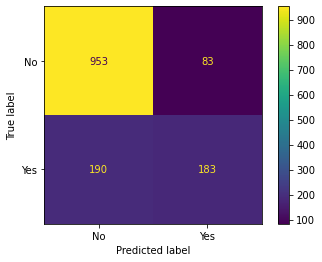

In [15]:
cm_test = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, 
                              display_labels=classification.classes_)
disp.plot()
plt.show()

In [16]:
list(zip(list(X_test.columns), list(np.abs(classification.coef_)[0])))

[('tenure', 2.102082803910639),
 ('SeniorCitizen', 1.626717054659968),
 ('MonthlyCharges', 0.417350191855013)]

#### Even a simple model will give us more than 70% accuracy. Why?

As our dependent variable presents a high class imbalance (see chart below), accuracy is telling us that the model is relatively good at predicting labels with value 'No' (majority sample), but what is really happening here is that our model is more inclined to predict the frequently occurring classes.

No     5174
Yes    1869
Name: Churn, dtype: int64


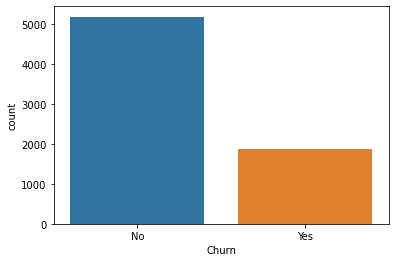

In [17]:
count_classes = customer_churn_cp['Churn'].value_counts()
print(count_classes)
sns.countplot(x = 'Churn', data = customer_churn_cp);
plt.show()

In [18]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.47


#### Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [19]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_norm,y_train)

In [20]:
# We can see that the size of the train set has increased substantially
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8276, 2)


In [21]:
y_train_SMOTE.value_counts()

No     4138
Yes    4138
Name: Churn, dtype: int64

In [24]:
classification_smote = LogisticRegression(max_iter=1000)
classification_smote.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = classification_smote.predict(X_test_norm)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label= 'Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label= 'Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label= 'Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.75
The precision in the TEST set is: 0.51
The recall in the TEST set is: 0.76
The F1 in the TEST set is: 0.61
The Kappa in the TEST set is: 0.43


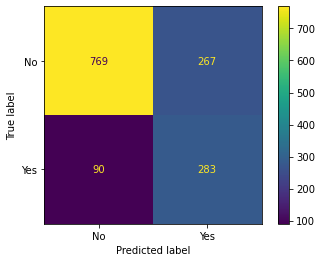

In [23]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classification_smote.classes_)
disp.plot()
plt.show()

Report:
- Accuracy = 0.75 vs 0.81. The accuracy (the proportion of correct predictions over total predictions) has decreased. 
- Precision = 0.69 vs 0.51. Precision, that identifies how accurately the model predicts the positive classes, has decreased substantially.
- Recall: 0.49 vs 0.76. The ratio of predicted positive clausses has increased.
- F1: 0.81 vs 0.61.
- Kappa: 0.43 vs 045. how good is our model at predictions? By the numbers we're getting, not really good. In fact, this metric got worse.